In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import nltk

In [88]:
lis_raw = pd.read_csv("/Users/lum/Documents/python/Capstone Airbnb review/Austin/listings.csv.gz", compression="gzip")
rev_raw = pd.read_csv("/Users/lum/Documents/python/Capstone Airbnb review/Austin/reviews.csv.gz", compression="gzip")
cal_raw = pd.read_csv("/Users/lum/Documents/python/Capstone Airbnb review/Austin/calendar.csv.gz", compression="gzip")
# lis = pd.read_csv("/Users/lum/Documents/python/Capstone Airbnb review/Austin/listings.csv")
# rev = pd.read_csv("/Users/lum/Documents/python/Capstone Airbnb review/Austin/reviews.csv")

# Listing Dataset

In [217]:
lis_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [221]:
lis_raw.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20230910055936,2023-09-10,city scrape,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,Week of July 31 - Aug 10 require min of 5 nig...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.83,4.73,4.79,NaN,f,1,1,0,0,3.72
1,5769,https://www.airbnb.com/rooms/5769,20230910055936,2023-09-11,previous scrape,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.76,4.92,NaN,f,1,0,1,0,1.77
2,6413,https://www.airbnb.com/rooms/6413,20230910055936,2023-09-11,previous scrape,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.73
3,6448,https://www.airbnb.com/rooms/6448,20230910055936,2023-09-10,city scrape,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,"Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,...,4.97,4.97,4.89,NaN,t,1,1,0,0,2.09
4,8502,https://www.airbnb.com/rooms/8502,20230910055936,2023-09-10,city scrape,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.87,4.67,4.60,NaN,f,1,1,0,0,0.31


In [249]:
lis_raw.head(1).T.head(50)

,0
id,5456
listing_url,https://www.airbnb.com/rooms/5456
scrape_id,20230910055936
last_scraped,2023-09-10
source,city scrape
name,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...
description,Week of July 31 - Aug 10 require min of 5 nig...
neighborhood_overview,My neighborhood is ideally located if you want...
picture_url,https://a0.muscache.com/pictures/14084884/b5a3...
host_id,8028


In [293]:
# process lis data
cols_to_keep = ["id","host_id","host_since","host_is_superhost","bedrooms","beds","price","minimum_nights",
                "number_of_reviews","reviews_per_month","number_of_reviews_l30d",
                "review_scores_rating","review_scores_accuracy","review_scores_cleanliness",
                "review_scores_checkin","review_scores_communication","review_scores_location",
                "review_scores_value",'neighbourhood_cleansed']
cols_rename = {"review_scores_rating": "score",
               "review_scores_accuracy": "score_1",
               "review_scores_cleanliness": "score_2",
               "review_scores_checkin": "score_3",
               "review_scores_communication": "score_4",
               "review_scores_location": "score_5",
               "review_scores_value": "score_6",
              'neighbourhood_cleansed':'zipcode'}

lis = lis_raw[cols_to_keep].rename(columns=cols_rename)
lis["price"] = lis["price"].str.replace("$","").str.replace(",","").astype(float)
lis["host_since"] = pd.to_datetime(lis["host_since"])
lis.loc[(lis["host_is_superhost"]=="t"), "superhost"] = 1
lis.loc[(lis["host_is_superhost"]=="f"), "superhost"] = 0
lis.head(3)

# process rev data
rev = rev_raw.copy()
rev["date"] = pd.to_datetime(rev["date"])
rev.head(3)

<ipython-input-293-3f9d72929983>:17: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,282342,913203,2012-02-11,633688,Claudia,This is a fantastic property with outstanding ...
2,282342,1064098,2012-03-31,1613219,Kerry,Chris and his family are great hosts. Very acc...


In [310]:
lis

,id,host_id,host_since,host_is_superhost,bedrooms,beds,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_l30d,score,score_1,score_2,score_3,score_4,score_5,score_6,zipcode,superhost
0,5456,8028,2009-02-16,t,1.0,2.0,126.0,2,657,3.72,4,4.84,4.87,4.85,4.90,4.83,4.73,4.79,78702,1.0
1,5769,8186,2009-02-19,t,NaN,1.0,45.0,1,290,1.77,0,4.90,4.90,4.87,4.91,4.94,4.76,4.92,78729,1.0
2,6413,13879,2009-04-17,f,NaN,1.0,57.0,30,122,0.73,0,4.97,4.99,4.99,4.99,4.98,4.87,4.93,78704,0.0
3,6448,14156,2009-04-20,t,1.0,2.0,159.0,3,305,2.09,1,4.97,4.97,4.96,4.99,4.97,4.97,4.89,78704,1.0
4,8502,25298,2009-07-11,f,1.0,1.0,48.0,4,51,0.31,0,4.56,4.52,4.70,4.84,4.87,4.67,4.60,78741,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,292849645,2019-09-07,f,1.0,1.0,50.0,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78725,0.0
14857,976810489807743834,272515104,2019-06-30,f,4.0,4.0,157.0,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78723,0.0
14858,976819043910196489,387932846,2021-02-09,f,3.0,4.0,117.0,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78721,0.0
14859,976821657557908773,536308631,2023-09-09,f,3.0,3.0,133.0,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78724,0.0


<AxesSubplot:xlabel='zipcode'>

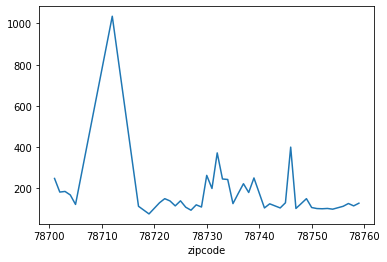

In [295]:
lis.groupby('zipcode')['price'].median().plot()

<AxesSubplot:xlabel='zipcode'>

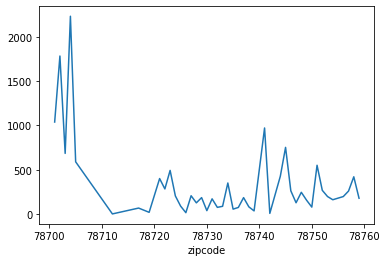

In [296]:
lis.groupby('zipcode')['price'].count().plot()

<AxesSubplot:>

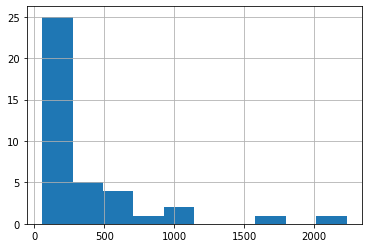

In [308]:
##Filter out zip codes with counts less than 50 
zip_counts = lis.groupby('zipcode')['price'].count().sort_values()
zip_counts = pd.DataFrame(zip_counts)
filtered_zip_codes = zip_counts[zip_counts['price'] <= 50].index
lis.loc[lis['zipcode'].isin(filtered_zip_codes),['zipcode']] = 0
lis.groupby('zipcode')['price'].count().hist()

In [435]:
zip_counts.count()

price    44
dtype: int64

In [322]:
## Get dummies on ZipCode
dummies = pd.get_dummies(lis['zipcode'], prefix='zip')
lis = pd.concat([lis, dummies], axis=1)

In [329]:
lis

,id,host_id,host_since,host_is_superhost,bedrooms,beds,price,minimum_nights,number_of_reviews,reviews_per_month,...,zip_78749,zip_78750,zip_78751,zip_78752,zip_78753,zip_78754,zip_78756,zip_78757,zip_78758,zip_78759
0,5456,8028,2009-02-16,t,1.0,2.0,126.0,2,657,3.72,...,0,0,0,0,0,0,0,0,0,0
1,5769,8186,2009-02-19,t,NaN,1.0,45.0,1,290,1.77,...,0,0,0,0,0,0,0,0,0,0
2,6413,13879,2009-04-17,f,NaN,1.0,57.0,30,122,0.73,...,0,0,0,0,0,0,0,0,0,0
3,6448,14156,2009-04-20,t,1.0,2.0,159.0,3,305,2.09,...,0,0,0,0,0,0,0,0,0,0
4,8502,25298,2009-07-11,f,1.0,1.0,48.0,4,51,0.31,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,292849645,2019-09-07,f,1.0,1.0,50.0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
14857,976810489807743834,272515104,2019-06-30,f,4.0,4.0,157.0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
14858,976819043910196489,387932846,2021-02-09,f,3.0,4.0,117.0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
14859,976821657557908773,536308631,2023-09-09,f,3.0,3.0,133.0,2,0,NaN,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

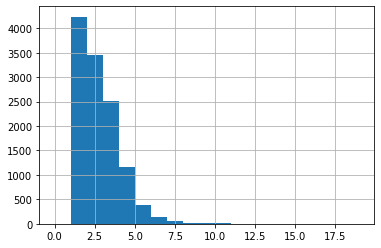

In [332]:
lis.bedrooms.hist(bins = range(0,20))

<AxesSubplot:>

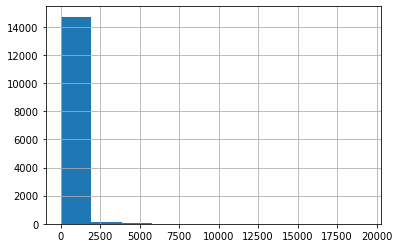

In [349]:
lis.price.hist()

<AxesSubplot:>

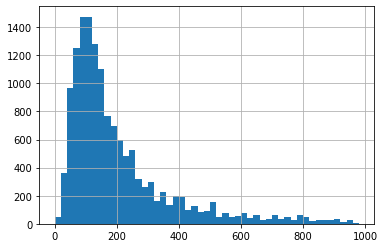

In [348]:
lis.price.hist(bins=range(0,1000, 20))

<AxesSubplot:>

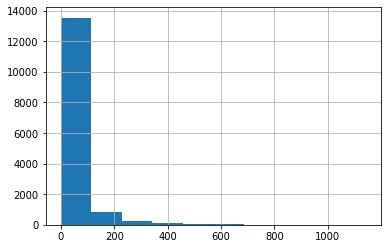

In [352]:
lis.number_of_reviews.hist()

<AxesSubplot:>

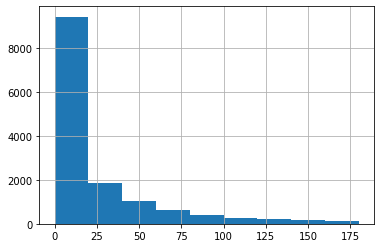

In [356]:
lis.number_of_reviews.hist(bins=range(0,200,20))

<AxesSubplot:>

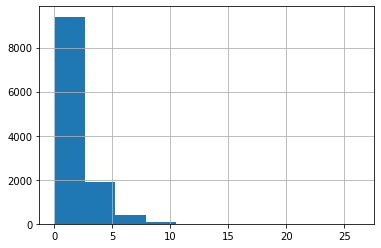

In [357]:
lis.reviews_per_month.hist()

# Review Dataset

In [423]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [408]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,282342,913203,2012-02-11,633688,Claudia,This is a fantastic property with outstanding ...
2,282342,1064098,2012-03-31,1613219,Kerry,Chris and his family are great hosts. Very acc...
3,282342,2169298,2012-09-02,2713331,Ahmed,"Excellent place, excellent location, excellent..."
4,282342,11345168,2014-03-31,11182084,El,What a great experience we had with the Host f...


In [359]:
rev.shape

(562390, 6)

In [360]:
rev.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         139
dtype: int64

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        return text.lower()  # Only apply to text data
    else:
        return text 

In [419]:
stop_words = set(stopwords.words('english'))
def clean_comment(comment):
    if pd.isnull(comment):
        return ""
    # Lowercasing
    #comment = comment.lower()
    # Tokenization
    tokens = word_tokenize(comment)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Join tokens back into a single string
    cleaned_comment = " ".join(tokens)
    return cleaned_comment

In [420]:
clean_comment(rev['comments'].iloc[4089])

'Lois place cozy private den relax quiet comfortable garden funky fun'

In [421]:
rev['clean_comments'] = rev['comments'].apply(clean_comment)

In [422]:
rev

,listing_id,id,date,reviewer_id,reviewer_name,comments,clean_comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...,Sylvia hostess gracious helpful beyond words F...
1,282342,913203,2012-02-11,633688,Claudia,This is a fantastic property with outstanding ...,This fantastic property outstanding hosts Grea...
2,282342,1064098,2012-03-31,1613219,Kerry,Chris and his family are great hosts. Very acc...,Chris family great hosts Very accommodating Th...
3,282342,2169298,2012-09-02,2713331,Ahmed,"Excellent place, excellent location, excellent...",Excellent place excellent location excellent h...
4,282342,11345168,2014-03-31,11182084,El,What a great experience we had with the Host f...,What great experience Host family They attenti...
...,...,...,...,...,...,...,...
562385,967468605103161056,971084957614230091,2023-09-01,155759105,Jesus,Great stay and great host very friendly and he...,Great stay great host friendly helpful
562386,971659837287184393,976140464130598541,2023-09-08,345147284,Pedro,Words couldn’t describe how perfect this place...,Words ’ describe perfect place
562387,967468605103161056,973281200842042947,2023-09-04,99961890,James,Great Host and room was very clean.,Great Host room clean
562388,973861068087887577,975443421727392403,2023-09-07,535849059,Matthias,We stayed at the place for 2 days and it was s...,We stayed place 2 days super comfy The place p...


In [426]:
analyzer = SentimentIntensityAnalyzer()

In [428]:
rev['sentiment_scores'] = rev['clean_comments'].apply(lambda comment: analyzer.polarity_scores(comment))

In [437]:
rev['sentiment_scores'].iloc[1]

{'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'compound': 0.9349}

In [436]:
rev

,listing_id,id,date,reviewer_id,reviewer_name,comments,clean_comments,sentiment_scores
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...,Sylvia hostess gracious helpful beyond words F...,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp..."
1,282342,913203,2012-02-11,633688,Claudia,This is a fantastic property with outstanding ...,This fantastic property outstanding hosts Grea...,"{'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'comp..."
2,282342,1064098,2012-03-31,1613219,Kerry,Chris and his family are great hosts. Very acc...,Chris family great hosts Very accommodating Th...,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp..."
3,282342,2169298,2012-09-02,2713331,Ahmed,"Excellent place, excellent location, excellent...",Excellent place excellent location excellent h...,"{'neg': 0.06, 'neu': 0.595, 'pos': 0.345, 'com..."
4,282342,11345168,2014-03-31,11182084,El,What a great experience we had with the Host f...,What great experience Host family They attenti...,"{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compou..."
...,...,...,...,...,...,...,...,...
562385,967468605103161056,971084957614230091,2023-09-01,155759105,Jesus,Great stay and great host very friendly and he...,Great stay great host friendly helpful,"{'neg': 0.0, 'neu': 0.123, 'pos': 0.877, 'comp..."
562386,971659837287184393,976140464130598541,2023-09-08,345147284,Pedro,Words couldn’t describe how perfect this place...,Words ’ describe perfect place,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp..."
562387,967468605103161056,973281200842042947,2023-09-04,99961890,James,Great Host and room was very clean.,Great Host room clean,"{'neg': 0.0, 'neu': 0.227, 'pos': 0.773, 'comp..."
562388,973861068087887577,975443421727392403,2023-09-07,535849059,Matthias,We stayed at the place for 2 days and it was s...,We stayed place 2 days super comfy The place p...,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp..."


# Calendar Dataset

In [144]:
cal_raw.shape

(5424270, 7)

In [99]:
cal_raw['date'] = pd.to_datetime(cal_raw['date'])

In [105]:
cal_raw['listing_id'].nunique()

14861

In [117]:
cal_raw[(cal_raw['listing_id']==6413) & (cal_raw['available']=='f')]#.count()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
730,6413,2023-09-11,f,$57.00,$57.00,30.0,90.0
731,6413,2023-09-12,f,$57.00,$57.00,30.0,90.0
732,6413,2023-09-13,f,$57.00,$57.00,30.0,90.0
733,6413,2023-09-14,f,$57.00,$57.00,30.0,90.0
734,6413,2023-09-15,f,$57.00,$57.00,30.0,90.0
...,...,...,...,...,...,...,...
1090,6413,2024-09-05,f,$57.00,$57.00,30.0,90.0
1091,6413,2024-09-06,f,$57.00,$57.00,30.0,90.0
1092,6413,2024-09-07,f,$57.00,$57.00,30.0,90.0
1093,6413,2024-09-08,f,$57.00,$57.00,30.0,90.0


In [124]:
x = cal_raw[cal_raw["available"]=="f"].groupby(["listing_id"]).apply(len).value_counts().sort_index()

In [433]:
x

1       276
2        90
3       101
4        73
5        69
       ... 
361      39
362      34
363      36
364      42
365    3689
Length: 365, dtype: int64

In [121]:
cal_raw["listing_id"].unique().size

14861

<AxesSubplot:>

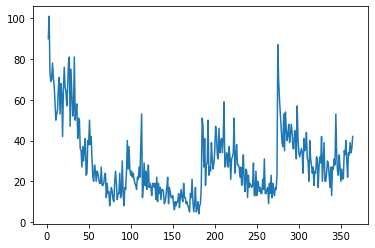

In [133]:
x[(x.index != 1) & (x.index != 365)].plot()

In [131]:
x.diff().sort_values()

2      -186.0
114     -41.0
28      -34.0
212     -32.0
34      -31.0
        ...  
29       28.0
185      33.0
275      64.0
365    3647.0
1         NaN
Length: 365, dtype: float64

<AxesSubplot:>

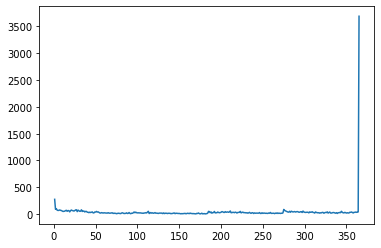

In [134]:
x.plot()

<AxesSubplot:>

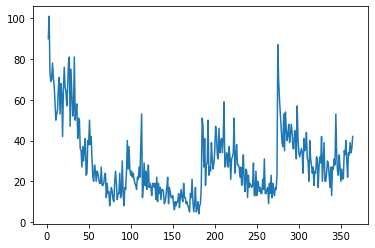

In [136]:
x[(x.index != 1) & (x.index !=365)].plot()

<AxesSubplot:>

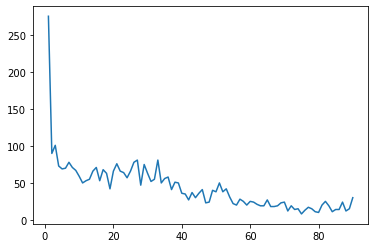

In [140]:
x[x.index<=90].plot()

In [178]:
cal_raw_90 = cal_raw[cal_raw['date']<='2023-12-11']

In [179]:
cal_raw_90.nunique()

listing_id        14861
date                 93
available             2
price              3103
adjusted_price     3148
minimum_nights       74
maximum_nights      178
dtype: int64

In [180]:
dates_ava = cal_raw_90[cal_raw_90['available']=='f'].groupby('listing_id')['date'].count()

In [181]:
cal_raw_90 = cal_raw_90.merge(dates_ava, on ='listing_id', how='left')

In [182]:
cal_raw_90 = cal_raw_90.rename(columns={'date_y':"available_num"})

In [198]:
cal_raw_90

,listing_id,date_x,available,price,adjusted_price,minimum_nights,maximum_nights,available_num
0,5456,2023-09-10,f,$200.00,$200.00,2.0,90.0,49.0
1,5456,2023-09-11,f,$95.00,$95.00,2.0,90.0,49.0
2,5456,2023-09-12,f,$95.00,$95.00,2.0,90.0,49.0
3,5456,2023-09-13,f,$95.00,$95.00,2.0,90.0,49.0
4,5456,2023-09-14,t,$95.00,$95.00,2.0,90.0,49.0
...,...,...,...,...,...,...,...,...
1378800,977065193661483652,2023-12-07,t,$400.00,$400.00,4.0,365.0,20.0
1378801,977065193661483652,2023-12-08,t,$400.00,$400.00,4.0,365.0,20.0
1378802,977065193661483652,2023-12-09,f,$400.00,$400.00,4.0,365.0,20.0
1378803,977065193661483652,2023-12-10,f,$400.00,$400.00,4.0,365.0,20.0


In [201]:
cal_raw_90 = cal_raw_90[cal_raw_90['available_num']<92]

<AxesSubplot:>

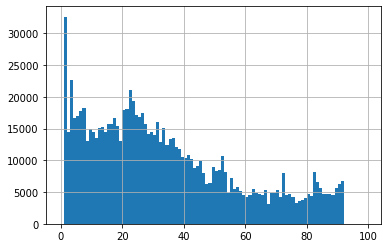

In [202]:
cal_raw_90['available_num'].hist(bins=range(0,100,1))

In [203]:
cal_raw_90['available_num'].value_counts()

1.0     32643
3.0     22690
22.0    21111
23.0    19344
7.0     18228
        ...  
79.0     3999
78.0     3812
77.0     3533
76.0     3345
67.0     3159
Name: available_num, Length: 91, dtype: int64

In [210]:
cal_raw_90[cal_raw_90["available"]=="f"]["date_x"].value_counts().sort_index().tail(50)

2023-10-23    3492
2023-10-24    2666
2023-10-25    2872
2023-10-26    3628
2023-10-27    4542
2023-10-28    4721
2023-10-29    3674
2023-10-30    2653
2023-10-31    2459
2023-11-01    2906
2023-11-02    3554
2023-11-03    4194
2023-11-04    4059
2023-11-05    2918
2023-11-06    2366
2023-11-07    2284
2023-11-08    2447
2023-11-09    2903
2023-11-10    3287
2023-11-11    3232
2023-11-12    2661
2023-11-13    2305
2023-11-14    2170
2023-11-15    2240
2023-11-16    2424
2023-11-17    2561
2023-11-18    2591
2023-11-19    2320
2023-11-20    2318
2023-11-21    2510
2023-11-22    2767
2023-11-23    2923
2023-11-24    2880
2023-11-25    2485
2023-11-26    2100
2023-11-27    1943
2023-11-28    1880
2023-11-29    1896
2023-11-30    1988
2023-12-01    2128
2023-12-02    2079
2023-12-03    1915
2023-12-04    1842
2023-12-05    1811
2023-12-06    1827
2023-12-07    1893
2023-12-08    1944
2023-12-09    3317
2023-12-10    3170
2023-12-11    3111
Name: date_x, dtype: int64

In [207]:
cal_raw_90

,listing_id,date_x,available,price,adjusted_price,minimum_nights,maximum_nights,available_num
0,5456,2023-09-10,f,$200.00,$200.00,2.0,90.0,49.0
1,5456,2023-09-11,f,$95.00,$95.00,2.0,90.0,49.0
2,5456,2023-09-12,f,$95.00,$95.00,2.0,90.0,49.0
3,5456,2023-09-13,f,$95.00,$95.00,2.0,90.0,49.0
4,5456,2023-09-14,t,$95.00,$95.00,2.0,90.0,49.0
...,...,...,...,...,...,...,...,...
1378800,977065193661483652,2023-12-07,t,$400.00,$400.00,4.0,365.0,20.0
1378801,977065193661483652,2023-12-08,t,$400.00,$400.00,4.0,365.0,20.0
1378802,977065193661483652,2023-12-09,f,$400.00,$400.00,4.0,365.0,20.0
1378803,977065193661483652,2023-12-10,f,$400.00,$400.00,4.0,365.0,20.0
